In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

arrests = pd.read_csv("https://raw.githubusercontent.com/UC-MACSS/persp-analysis/master/assignments/unsupervised-learning/data/USArrests.csv")

x = arrests.loc[:,'Murder':'Rape']
y = arrests.loc[:,'State']

states = arrests.loc[:,'State']

%matplotlib inline

1) Perform PCA on the dataset and plot the observations on the first and second principal components.

,PC1,PC2
Murder,0.041704,0.044822
Assault,0.995221,0.058760
UrbanPop,0.046336,-0.976857
Rape,0.075156,-0.200718


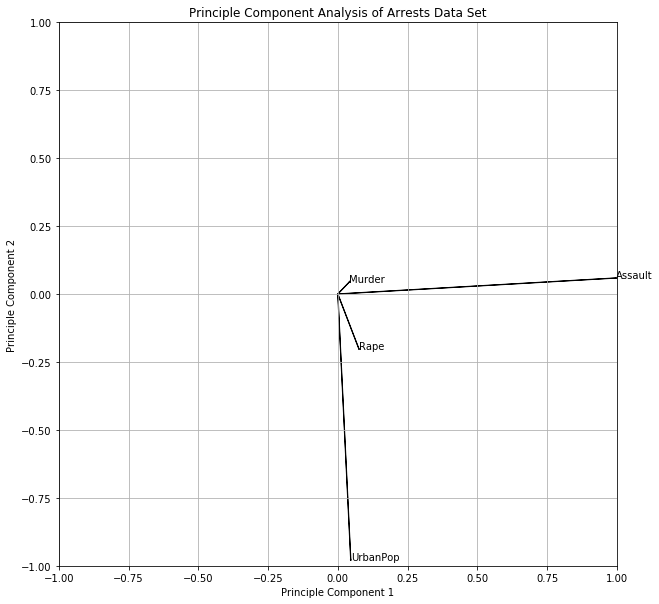

In [2]:
pca_arrests = PCA()
pca_arrests = pca_arrests.fit(x)
pca_arrests_df = pd.DataFrame(pca_arrests.components_)
pca_arrests_df.columns = x.columns

pca_arrests_df = pca_arrests_df.transpose()
pca_arrests_df = pca_arrests_df.loc[:,'0':'1']
pca_arrests_df.columns = ['PC1','PC2']

factors = pca_arrests_df.index

plt.figure(figsize=(10,10))
plt.ylim(ymax = 1, ymin = -1)
plt.xlim(xmax = 1, xmin = -1)

for i in range(0,len(pca_arrests_df)):
    plt.arrow(0, 0, pca_arrests_df['PC1'][i], pca_arrests_df['PC2'][i])

for factor in factors:
    plt.annotate(factor,(pca_arrests_df['PC1'][factor], pca_arrests_df['PC2'][factor]))
    
plt.ylabel("Principle Component 2")
plt.xlabel("Principle Component 1")
plt.title("Principle Component Analysis of Arrests Data Set")
plt.grid(True)



pca_arrests_df

,PC1,PC2
Murder,0.985566,1.950138
Assault,1.133392,1.073213
UrbanPop,-0.444269,2.040003
Rape,0.156267,-0.438583


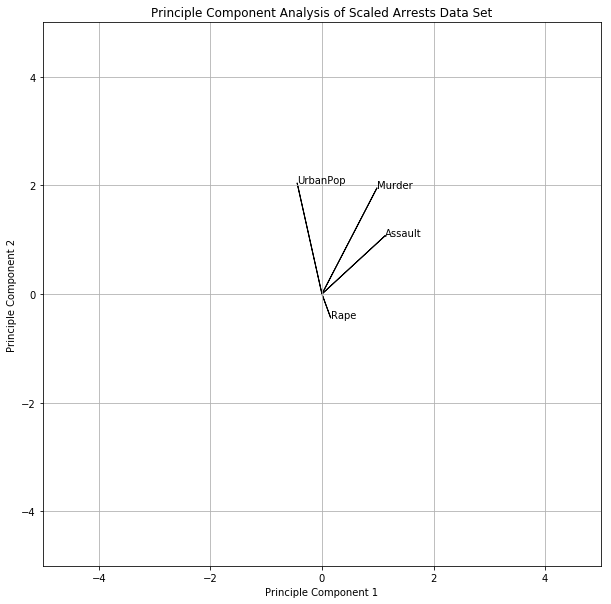

In [3]:
scaled_arrests = StandardScaler()
scaled_arrests = scaled_arrests.fit_transform(x)
scale_pca = PCA()
scale_pca = scale_pca.fit(scaled_arrests).transform(scaled_arrests)

scale_pca_df = pd.DataFrame(scale_pca)
scale_pca_df.columns = x.columns
scale_pca_df = scale_pca_df.transpose()
scale_pca_df = scale_pca_df.loc[:,'0':'1']
scale_pca_df.columns = ['PC1','PC2']

factors = scale_pca_df.index

plt.figure(figsize=(10,10))
plt.ylim(ymax = 5, ymin = -5)
plt.xlim(xmax = 5, xmin = -5)

for i in range(0,len(scale_pca_df)):
    plt.arrow(0, 0, scale_pca_df['PC1'][i], scale_pca_df['PC2'][i])

for factor in factors:
    plt.annotate(factor,(scale_pca_df['PC1'][factor], scale_pca_df['PC2'][factor]))
    
plt.ylabel("Principle Component 2")
plt.xlabel("Principle Component 1")
plt.title("Principle Component Analysis of Scaled Arrests Data Set")
plt.grid(True)

scale_pca_df

In [4]:
states_df = PCA(2)
states_df = states_df.fit(x).transform(x)
states_df = pd.DataFrame(states_df, index = arrests['State'])
states_df.columns = ['PC1','PC2']

In [5]:
model = KMeans(n_clusters = 2)

model.fit(x)

labels = model.labels_

states_df['k2_clusters'] = labels

states_df

,PC1,PC2,k2_clusters
State,,,
Alabama,64.802164,11.448007,1
Alaska,92.827450,17.982943,1
Arizona,124.068216,-8.830403,1
Arkansas,18.340035,16.703911,1
California,107.422953,-22.520070,1
Colorado,34.975986,-13.719584,1
Connecticut,-60.887282,-12.932530,0
Delaware,66.731025,-1.353798,1
Florida,165.244370,-6.274690,1


Perform $K$-means clustering with $K=2$. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.


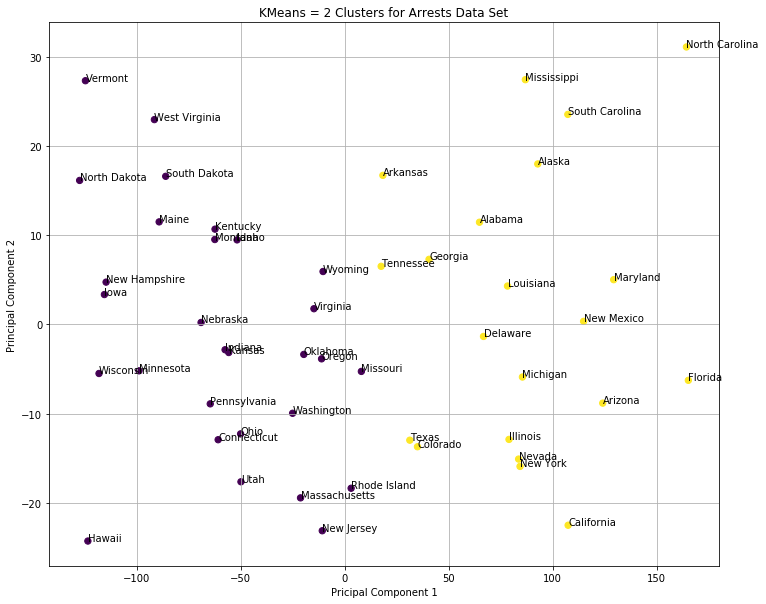

In [6]:
pca1 = states_df['PC1']
pca2 = states_df['PC2']
clusters = states_df['k2_clusters']

plt.figure(figsize = (12,10))

plt.scatter(pca1,
            pca2,
            c = clusters,
           s = 40)

for i, state in enumerate(y):
    plt.annotate(states_df.index[i],(pca1[i],pca2[i]))
    
plt.xlabel("Pricipal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans = 2 Clusters for Arrests Data Set")
plt.grid(True)
plt.show()

In [34]:

print("States in Cluster 1:")

[print(states_df.index[i]) for i in range(0, len(states_df)) if states_df['k2_clusters'][i] == 0]

print("-------------------------------------------")

print("States in Cluster 2: ")
[print(states_df.index[i]) for i in range(0, len(states_df)) if states_df['k2_clusters'][i] == 1]

States in Cluster 1:
Connecticut
Hawaii
Idaho
Indiana
Iowa
Kansas
Kentucky
Maine
Massachusetts
Minnesota
Missouri
Montana
Nebraska
New Hampshire
New Jersey
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Dakota
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming
-------------------------------------------
States in Cluster 2: 
Alabama
Alaska
Arizona
Arkansas
California
Colorado
Delaware
Florida
Georgia
Illinois
Louisiana
Maryland
Michigan
Mississippi
Nevada
New Mexico
New York
North Carolina
South Carolina
Tennessee
Texas


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Perform $K$-means clustering with $K=4$. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.

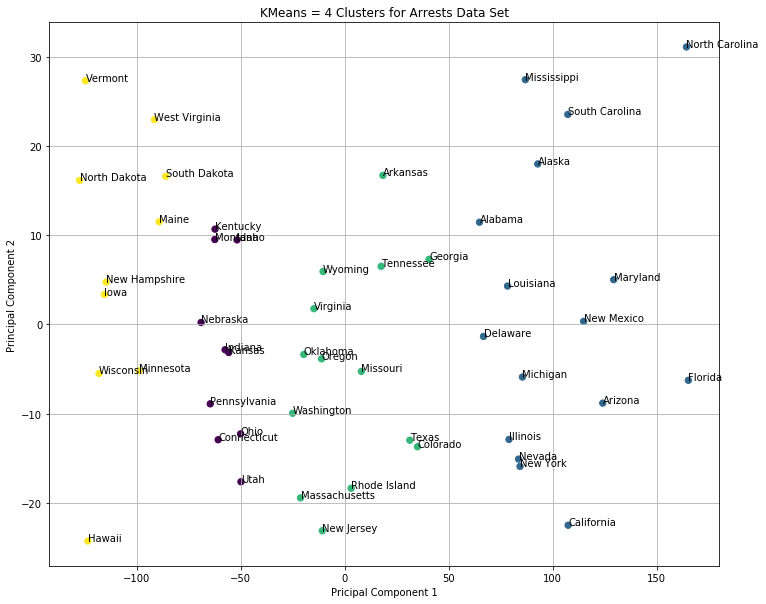

In [7]:
model_k4 = KMeans(n_clusters = 4)

model_k4.fit(x)

labels = model_k4.labels_

states_df['k4_clusters'] = labels


pca1 = states_df['PC1']
pca2 = states_df['PC2']
clusters = states_df['k4_clusters']

plt.figure(figsize = (12,10))

plt.scatter(pca1,
            pca2,
            c = clusters,
           s = 40)

for i, state in enumerate(y):
    plt.annotate(states_df.index[i],(pca1[i],pca2[i]))
    
plt.xlabel("Pricipal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans = 4 Clusters for Arrests Data Set")
plt.grid(True)
plt.show()


In [36]:
print("States in Cluster 1:")

[print(states_df.index[i]) for i in range(0, len(states_df)) if states_df['k4_clusters'][i] == 0]

print("-------------------------------------------")

print("States in Cluster 2: ")
[print(states_df.index[i]) for i in range(0, len(states_df)) if states_df['k4_clusters'][i] == 1]

print("-------------------------------------------")

print("States in Cluster 3: ")
[print(states_df.index[i]) for i in range(0, len(states_df)) if states_df['k4_clusters'][i] == 2]

print("-------------------------------------------")

print("States in Cluster 4: ")
[print(states_df.index[i]) for i in range(0, len(states_df)) if states_df['k4_clusters'][i] == 3]

States in Cluster 1:
Connecticut
Idaho
Indiana
Kansas
Kentucky
Montana
Nebraska
Ohio
Pennsylvania
Utah
-------------------------------------------
States in Cluster 2: 
Alabama
Alaska
Arizona
California
Delaware
Florida
Illinois
Louisiana
Maryland
Michigan
Mississippi
Nevada
New Mexico
New York
North Carolina
South Carolina
-------------------------------------------
States in Cluster 3: 
Arkansas
Colorado
Georgia
Massachusetts
Missouri
New Jersey
Oklahoma
Oregon
Rhode Island
Tennessee
Texas
Virginia
Washington
Wyoming
-------------------------------------------
States in Cluster 4: 
Hawaii
Iowa
Maine
Minnesota
New Hampshire
North Dakota
South Dakota
Vermont
West Virginia
Wisconsin


[None, None, None, None, None, None, None, None, None, None]

Perform $K$-means clustering with $K=3$. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.

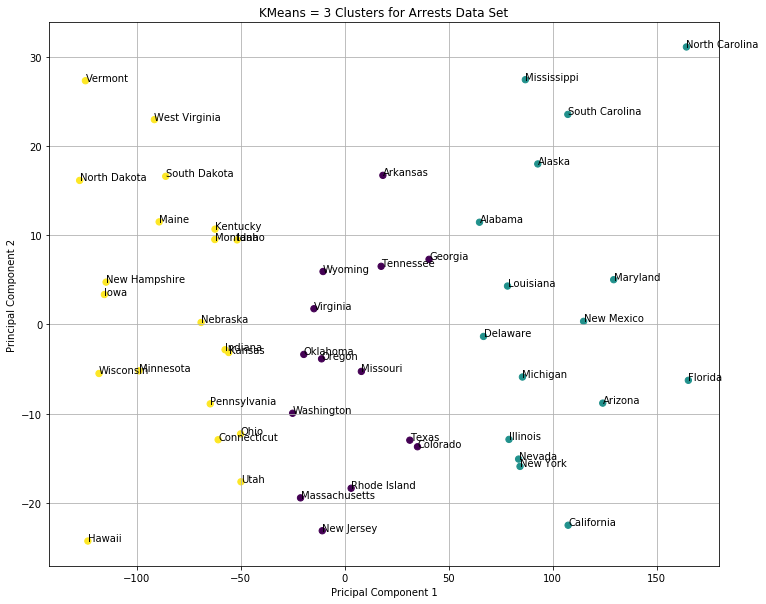

In [8]:
model_k3 = KMeans(n_clusters = 3)

model_k3.fit(x)

labels = model_k3.labels_

states_df['k3_clusters'] = labels


pca1 = states_df['PC1']
pca2 = states_df['PC2']
clusters = states_df['k3_clusters']

plt.figure(figsize = (12,10))

plt.scatter(pca1,
            pca2,
            c = clusters,
           s = 40)

for i, state in enumerate(y):
    plt.annotate(states_df.index[i],(pca1[i],pca2[i]))
    
plt.xlabel("Pricipal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans = 3 Clusters for Arrests Data Set")
plt.grid(True)
plt.show()



In [37]:
print("States in Cluster 1:")

[print(states_df.index[i]) for i in range(0, len(states_df)) if states_df['k3_clusters'][i] == 0]

print("-------------------------------------------")

print("States in Cluster 2: ")
[print(states_df.index[i]) for i in range(0, len(states_df)) if states_df['k3_clusters'][i] == 1]

print("-------------------------------------------")

print("States in Cluster 3: ")
[print(states_df.index[i]) for i in range(0, len(states_df)) if states_df['k3_clusters'][i] == 2]


States in Cluster 1:
Connecticut
Hawaii
Idaho
Indiana
Iowa
Kansas
Kentucky
Maine
Minnesota
Montana
Nebraska
New Hampshire
North Dakota
Ohio
Pennsylvania
South Dakota
Utah
Vermont
West Virginia
Wisconsin
-------------------------------------------
States in Cluster 2: 
Alabama
Alaska
Arizona
California
Delaware
Florida
Illinois
Louisiana
Maryland
Michigan
Mississippi
Nevada
New Mexico
New York
North Carolina
South Carolina
-------------------------------------------
States in Cluster 3: 
Arkansas
Colorado
Georgia
Massachusetts
Missouri
New Jersey
Oklahoma
Oregon
Rhode Island
Tennessee
Texas
Virginia
Washington
Wyoming


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### Perform $K$-means clustering with $K=3$ on the first two principal components score vectors, rather than the raw data. Describe your results and compare them to the clustering results with $K=3$ based on the raw data.

There is a slight difference between the two clustering efforts. the Clusters with the principal component score vectors should be more accurate than the raw data if the score vectors are scaled at the outset of the clustering and should retain the same basic correlation and plots if the number of KMeans is maintained. 

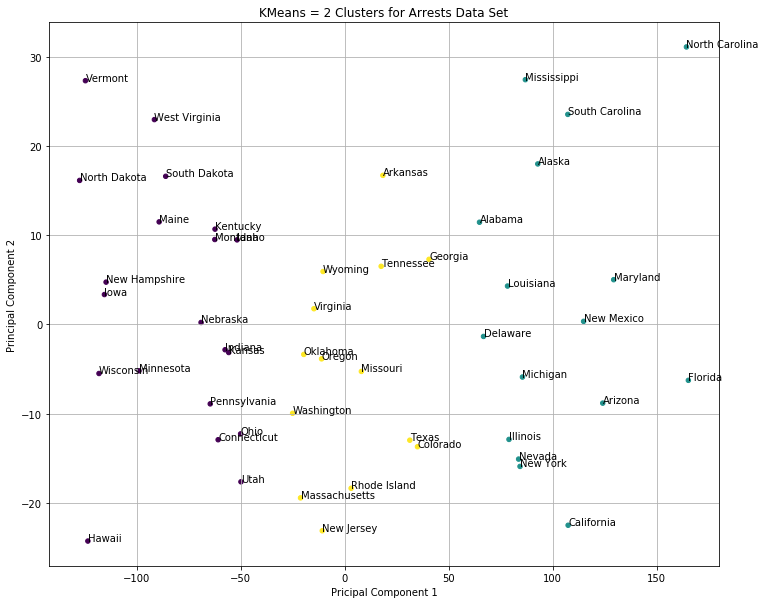

In [9]:
states_pc = states_df.loc[:,'PC1':'PC2']

model_k3 = KMeans(n_clusters = 3)

model_k3.fit(states_pc)

labels = model_k3.labels_

states_df['k3_clusters'] = labels


pca1 = states_df['PC1']
pca2 = states_df['PC2']
clusters = states_df['k3_clusters']

plt.figure(figsize = (12,10))

plt.scatter(pca1,
            pca2,
            c = clusters,
           s = 20)

for i, state in enumerate(y):
    plt.annotate(states_df.index[i],(pca1[i],pca2[i]))
    
plt.xlabel("Pricipal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans = 3 Clusters for PC Score Vectors on Arrests Data Set")
plt.grid(True)
plt.show()

6) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

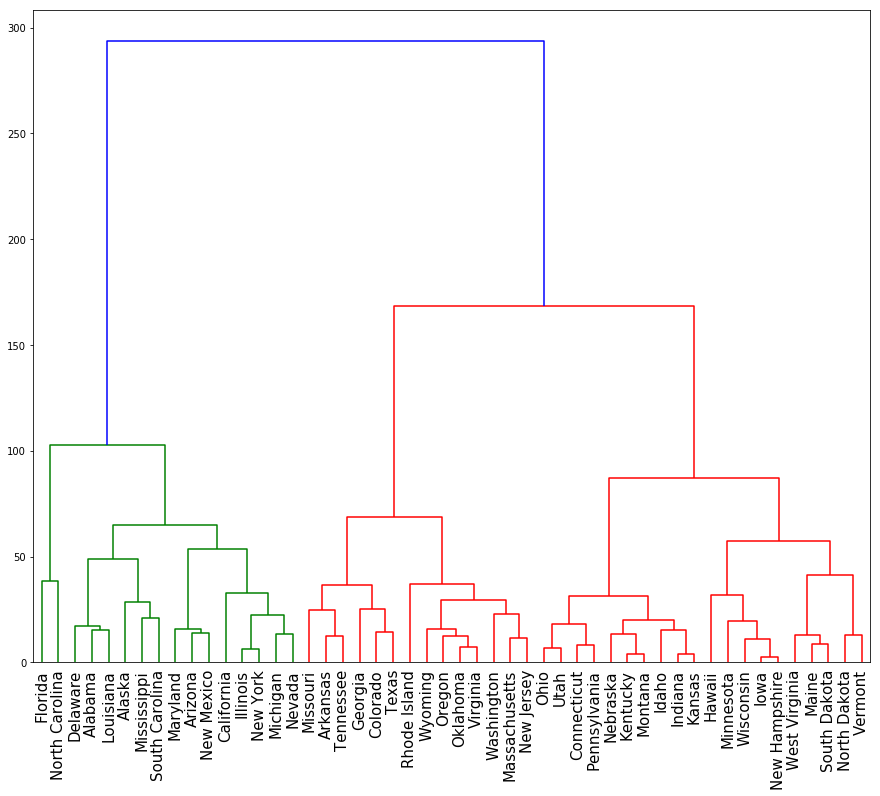

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram,cut_tree

%matplotlib inline

plt.figure(figsize = (15,12))

states = arrests['State'].unique()

merge = linkage(x, 
                method = 'complete')
dendrogram(merge, labels = states, leaf_font_size = 15)

plt.show()

Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

<function matplotlib.pyplot.show>

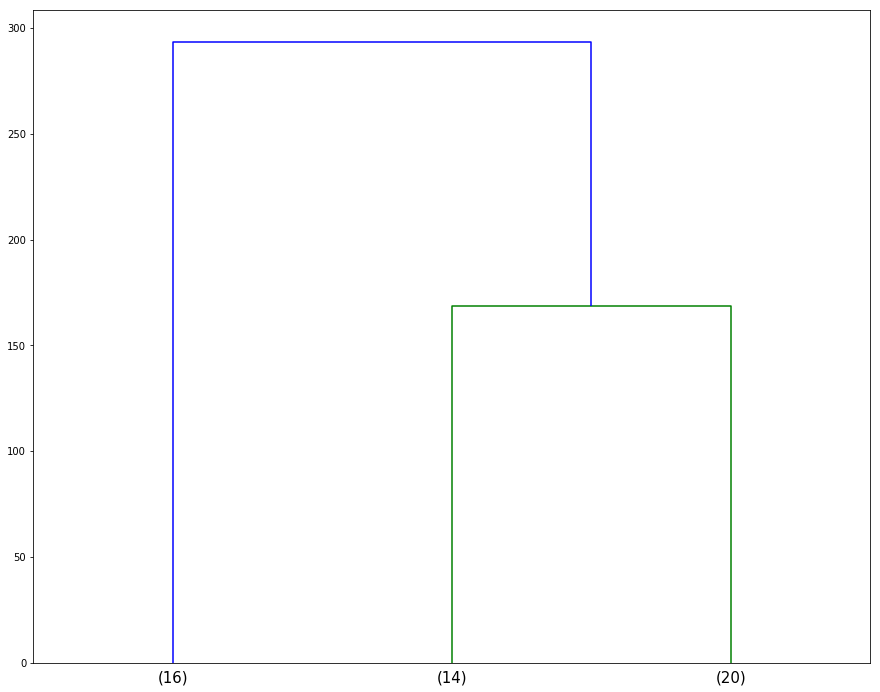

In [11]:
plt.figure(figsize = (15,12))

states = arrests['State'].unique()

merge = linkage(x, 
                method = 'complete')
dendrogram(merge,
           labels = states,
           leaf_font_size = 15,
           truncate_mode = 'lastp',
           p = 3
          )
plt.show

### Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation $1$. What effect does scaling the variables have on the hierarchical clustering obtained?

Scaling the variables allows to for a more accurate comparison between different types of crimes. Because variance can heavily influence clusters, and different crimes have different variances, not scaling the crimes data can have adverse effects when analyzing the data, possibly making one crime look more significant that another. For example, the number of burglaries is most likely higher than arson cases, but when scaled, the rates level those different types of crimes out. As a result of scaling these clusters, compared to the raw data, we can see an increase in the number of clusters earlier in the data set. Because the data is scaled and normalized, the KMeans algorithm is able to detect more patterns than had existed in the raw data. 


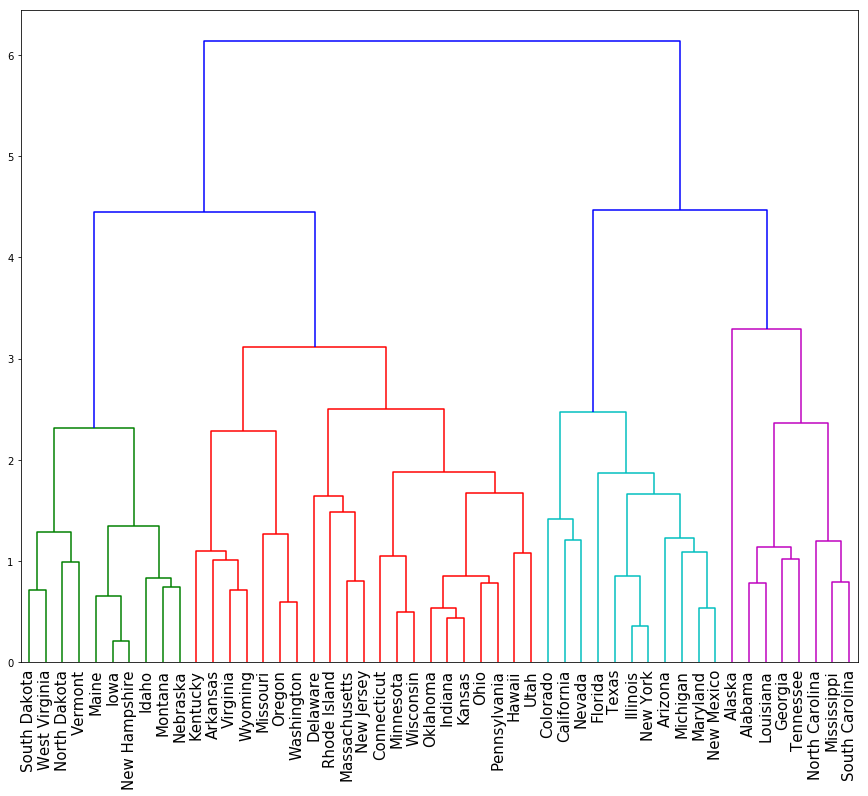

In [12]:
from sklearn.preprocessing import StandardScaler
plt.figure(figsize = (15,12))
scaler = StandardScaler()

z = scaler.fit_transform(x)

a = linkage(z, method = 'complete')
dendrogram(a,
           labels = states,
           leaf_font_size = 15
          )
plt.show()

In [38]:
states_df

,PC1,PC2,k2_clusters,k4_clusters,k3_clusters
State,,,,,
Alabama,64.802164,11.448007,1,1,1
Alaska,92.827450,17.982943,1,1,1
Arizona,124.068216,-8.830403,1,1,1
Arkansas,18.340035,16.703911,1,2,2
California,107.422953,-22.520070,1,1,1
Colorado,34.975986,-13.719584,1,2,2
Connecticut,-60.887282,-12.932530,0,0,0
Delaware,66.731025,-1.353798,1,1,1
Florida,165.244370,-6.274690,1,1,1
